##Forward  Feature Selection
Feature-we are going to select important columns for ML problem
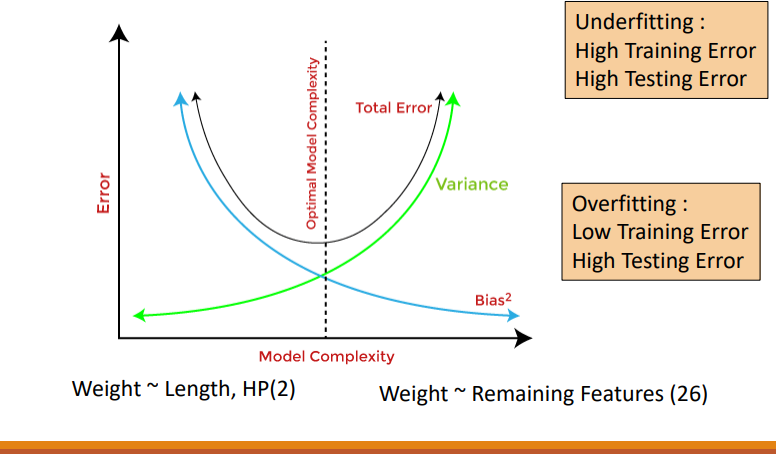

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Step1:Read the Data set

In [2]:
import pandas as pd
df=pd.read_csv('Cars93.csv',na_values=['','NA'],keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


Step2:Basic Data quality check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [4]:
m=df.isna().sum()
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [5]:
df.duplicated().sum()

0

##Step3:Seperate x and y(weight-is the target feature)

In [6]:
x=df.drop(columns=['id','Weight'])
y=df[['Weight']]

In [7]:
x.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [8]:
y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


Step4:Create a Feature selection pipeline 

In [9]:
cat=list(x.columns[x.dtypes=='object'])
con=list(x.columns[x.dtypes!='object'])

In [10]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [11]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                         ('scaler',StandardScaler())])

In [14]:
cat_pipe1=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                         ('ordinal',OrdinalEncoder())])

In [15]:
pre1=ColumnTransformer([('num',num_pipe1,con),
                        ('cat',cat_pipe1,cat)]).set_output(transform='pandas')

In [16]:
x_pre1=pre1.fit_transform(x)
x_pre1.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,num__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Origin,cat__Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,-1.033015,0.0,48.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.396643,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.039228,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,1.111472,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,-0.318186,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [18]:
lr=LinearRegression()
sel=SequentialFeatureSelector(estimator=lr,
                              n_features_to_select='auto',
                              direction='forward')
sel.fit_transform(x_pre1,y)
imp_colm=sel.get_feature_names_out()
imp_colm

array(['num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Length',
       'num__Wheelbase', 'num__Width', 'num__Rear.seat.room',
       'cat__Manufacturer', 'cat__Type', 'cat__Cylinders', 'cat__Origin'],
      dtype=object)

In [19]:
len(imp_colm)

13

In [20]:
imp_colm[0]

'num__MPG.highway'

In [22]:
imp_colm[0].split('__')

['num', 'MPG.highway']

In [23]:
imp_colm[0].split('__')[1]

'MPG.highway'

In [25]:
sel_col=[]
for i in imp_colm:
    s=i.split('__')[1]
    sel_col.append(s)
sel_col

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Rear.seat.room',
 'Manufacturer',
 'Type',
 'Cylinders',
 'Origin']

In [26]:
x_sel=x[sel_col]

In [27]:
x_sel.head()

,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Rear.seat.room,Manufacturer,Type,Cylinders,Origin
0,31,140,6300,13.2,5,177,102,68,26.5,Acura,Small,4,non-USA
1,25,200,5500,18.0,5,195,115,71,30.0,Acura,Midsize,6,non-USA
2,26,172,5500,16.9,5,180,102,67,28.0,Audi,Compact,6,non-USA
3,26,172,5500,21.1,6,193,106,70,31.0,Audi,Midsize,6,non-USA
4,30,208,5700,21.1,4,186,109,69,27.0,BMW,Midsize,4,non-USA


## Final pipeline created

In [31]:
cat_sel=list(x_sel.columns[x_sel.dtypes=='object'])
con_sel=list(x_sel.columns[x_sel.dtypes!='object'])

In [32]:
cat_sel

['Manufacturer', 'Type', 'Cylinders', 'Origin']

In [33]:
con_sel

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Rear.seat.room']

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [37]:
cat_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False))])

In [38]:
pre2=ColumnTransformer([('num',num_pipe2,con_sel),
                        ('cat',cat_pipe2,cat_sel)]).set_output(transform='pandas')

In [39]:
sel_pre=pre2.fit_transform(x_sel)
sel_pre.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Rear.seat.room,cat__Manufacturer_Acura,...,cat__Type_Sporty,cat__Type_Van,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
0,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.452197,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.770514,1.078322,0.369586,0.409445,-0.083243,0.812171,1.629649,0.431983,0.738090,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.581941,0.540813,0.369586,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,0.057926,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.581941,0.540813,0.369586,1.359872,0.884457,0.674465,0.302785,0.165927,1.078172,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.172352,1.231897,0.706562,1.359872,-1.050944,0.192493,0.745073,-0.100128,-0.282156,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


step6:train test split

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(sel_pre,y,test_size=0.2,random_state=21)

In [41]:
xtrain.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Rear.seat.room,cat__Manufacturer_Acura,...,cat__Type_Sporty,cat__Type_Van,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
57,-0.016221,-0.265452,-0.304365,-0.663618,-0.083243,-0.564892,0.155356,-0.632239,-0.622238,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31,0.172352,-0.323043,2.054464,-1.062184,-0.083243,-0.840305,-0.876650,-0.632239,0.057926,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
62,-0.959087,1.116716,1.212025,0.716035,-0.083243,0.467905,0.450214,0.165927,-0.112115,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29,-0.204794,1.347077,0.875050,0.409445,0.884457,1.294143,1.334791,1.230149,0.738090,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51,-0.581941,1.270290,-1.146804,1.022624,0.884457,2.464647,1.924508,2.028316,1.248213,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [42]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [43]:
xtest.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Rear.seat.room,cat__Manufacturer_Acura,...,cat__Type_Sporty,cat__Type_Van,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
23,-0.016221,-0.975733,-0.809828,-0.816912,-0.083243,-0.771452,-1.024079,-0.632239,-0.452197,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
86,-1.336233,-0.111878,-0.472853,0.961306,1.852158,0.261346,1.334791,0.431983,2.438501,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
91,-0.204794,-0.572601,0.201098,-0.265051,-0.083243,0.467905,0.007926,-0.632239,0.568049,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
21,-0.581941,0.060893,-0.809828,-0.203734,0.884457,1.362996,0.892502,-0.100128,2.778583,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17,-0.581941,0.502419,-1.820755,1.942392,0.884457,2.120381,1.777079,2.028316,0.568049,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [44]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


Step7:Evaluating the model

In [45]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

Step8:Evaluate the model

In [46]:
model.score(xtrain,ytrain)

0.9867532384604593

In [47]:
model.score(xtest,ytest)

0.9504488726682875